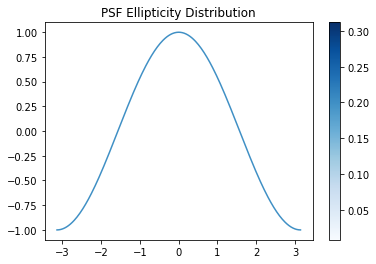

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
cmap = plt.get_cmap('Blues')
color_min = 0.008
color_max = 0.312
# norm = mpl.colors.Normalize(vmin=color_min,vmax=color_max)
norm = plt.Normalize(vmin=color_min, vmax=color_max)

# Make plot with vertical (default) colorbar
fig, ax = plt.subplots()

# data = np.clip(randn(250, 250), -1, 1)

# cax = ax.imshow(data, interpolation='nearest', cmap=cm.coolwarm)
ax.set_title('PSF Ellipticity Distribution')

# Add colorbar, make sure to specify tick locations to match desired ticklabels


# cbar = fig.colorbar(cmap=cmap, ticks=[-1, 0, 1])
# cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=color_min, vmax=color_max))
sm._A = []
plt.colorbar(sm)







# plt.colorbar()



plt.plot(X, C, color=cmap(norm(0.2)))
# plt.plot(X, S)


plt.show()

In [6]:
import numpy as np
[psf_mesh_x, psf_mesh_y] = np.mgrid[0:5,0:5]
a=psf_mesh_x.ravel()
b=psf_mesh_x[:2,:2].copy().ravel()
print(b)
print(np.shares_memory(b,psf_mesh_x))
# print(psf_mesh_x)
# print(a)
# print(a.reshape((5,5)))

[0 0 1 1]
False


In [29]:
[ psf_mesh_y,psf_mesh_x] = np.mgrid[0:5,0:5]
psf_mesh_x=psf_mesh_x-23.5
print(psf_mesh_x)
# print(psf_mesh_y)
print(type(psf_mesh_x))
print(np.shares_memory(psf_mesh_x,psf_mesh_y))

[[-23.5 -22.5 -21.5 -20.5 -19.5]
 [-23.5 -22.5 -21.5 -20.5 -19.5]
 [-23.5 -22.5 -21.5 -20.5 -19.5]
 [-23.5 -22.5 -21.5 -20.5 -19.5]
 [-23.5 -22.5 -21.5 -20.5 -19.5]]
<class 'numpy.ndarray'>
False


In [4]:
print('{0:02d}'.format(4))

04


In [5]:
# Use the spectral colormap for examples
cmap = plt.cm.Spectral

# Generate some fake data
N = 100
nlines = 10
x = np.linspace(-np.pi, np.pi, N) 
y = np.linspace(-np.pi, np.pi, nlines)

# Use np.newaxis to create [N,1] and [1,Nlines] x and y arrays
# Then broadcasting to generate Z with shape [N,Nlines]
z = np.sin(x[:,np.newaxis] + y[np.newaxis,:]/4)

# Use 0-1 values to generate the colors with the linspace method
line_colors = cmap(np.linspace(0,1,nlines))

# We have to generate our own axis to put the colorbar in
# otherwise it "steals" space from the current axis.  Please
# let me know if anyone has found another way around this,
# because the custom axes generation is the only way I've
# figured out.
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize = (12,6))
nrows = 2
gs = GridSpec(nrows,2,width_ratios=[50,1])
ax = [plt.subplot(gs[i,0]) for i in range(nrows)]
cbax1 = plt.subplot(gs[1,1])

# First, plot lines w/ legend
a = ax[0]
a.set_title('Labeling with a legend')

for i in range(nlines):
    a.plot(x, z[:,i], c=line_colors[i],lw=3,label='{:4.1f}'.format(y[i]))
leg = a.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
leg.set_title('Y')

# Next, plot with colorbar
a = ax[1]
a.set_title('Labeling with a "continuous" colorbar')

for i in range(nlines):
    a.plot(x, z[:,i], c=line_colors[i],lw=3,label='{:3.1f}'.format(y[i]))

# Generate fake ScalarMappable for colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=y[0],vmax=y[-1]))
sm.set_array([])  # You have to set a dummy-array for this to work...
cbar = plt.colorbar(sm, cax=cbax1)
cbar.set_label('Y')
cbar.set_ticks(y)
cbar.set_ticklabels(['{:4.1f}'.format(yi) for yi in y]) # Make 'em nicer-looking

# Moves colorbar closer to main axis by adjusting width-spacing between subplot axes.
fig.subplots_adjust(wspace=0.05, hspace=0.4)

# Set axis limits
for a in ax:
    a.set_xlim(-np.pi, np.pi)

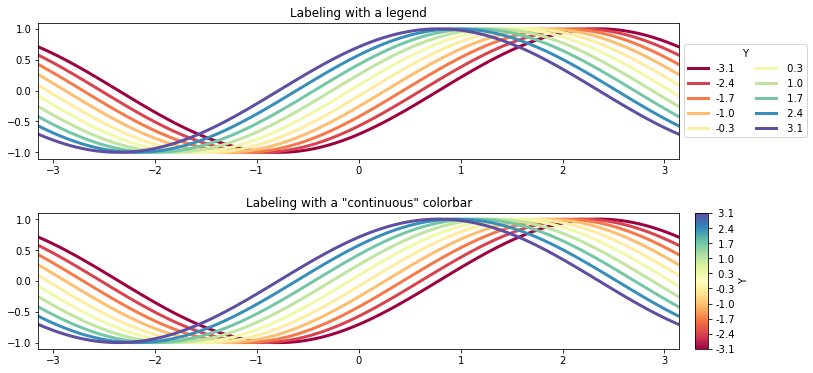

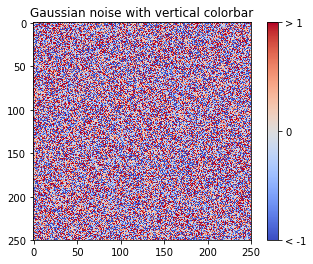

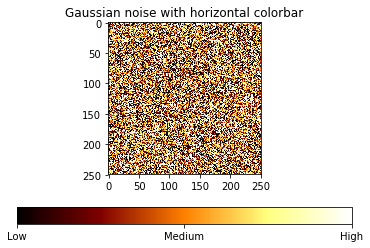

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from numpy.random import randn

# Make plot with vertical (default) colorbar
fig, ax = plt.subplots()

data = np.clip(randn(250, 250), -1, 1)

cax = ax.imshow(data, interpolation='nearest', cmap=cm.coolwarm)
ax.set_title('Gaussian noise with vertical colorbar')

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar

# Make plot with horizontal colorbar
fig, ax = plt.subplots()

data = np.clip(randn(250, 250), -1, 1)

cax = ax.imshow(data, interpolation='nearest', cmap=cm.afmhot)
ax.set_title('Gaussian noise with horizontal colorbar')

cbar = fig.colorbar(cax, ticks=[-1, 0, 1], orientation='horizontal')
cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar

plt.show()

In [ ]:
# import numpy as np
import matplotlib.mlab as mlab
import pickle
import matplotlib.pyplot as plt

region, exp_num, tag, part_name = 'w2m0m0', '831555', 'exposure', 'all'
with open('../assets/cache/{}_{}_{}_{}.p'.format(region, exp_num, tag, part_name), 'rb') as pickle_file:
    pickle_data = pickle.load(pickle_file)
    ellip_vector = pickle_data['ellip_vector']
    coord = pickle_data['coord']
    color = pickle_data['color']

# mu, sigma = 100, 15
# x = mu + sigma*np.random.randn(10000)

# the histogram of the data
weights = np.ones_like(color)/len(color)
n, bins, patches = plt.hist(color,30, weights=weights, facecolor='green')

# add a 'best fit' line
# y = mlab.normpdf( bins, mu, sigma)
# l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([0, 0.32, 0, 0.2])
plt.grid(True)

plt.show()

In [2]:
plt.hist?